**Reference**: William Stallings, "Cryptography and Network Security: Principles And Practice: Chapter 9: Seventh Edition”, Pearson 2017

**Modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im

# This module was created by me
import rsa

**Read an image**

Text(0.5, 1.0, 'Selected Image')

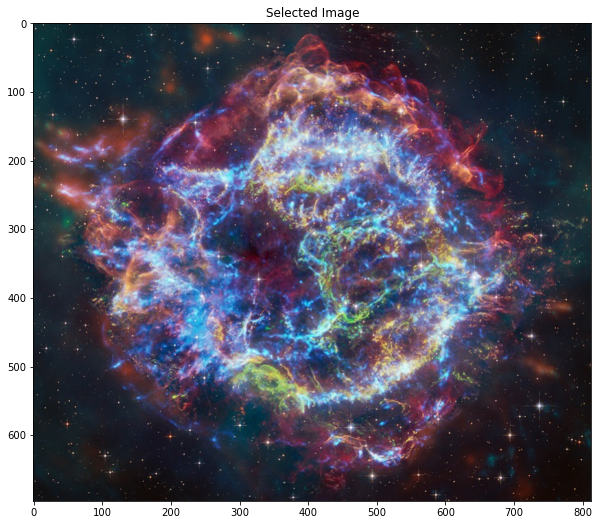

In [2]:
# Image Source: https://www.instagram.com/p/C15OphHpiT6
img = im.imread("./img.jpg")

fig, axis = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 10))
axis.imshow(img)
axis.set_title("Selected Image")

**Create 2 users: Alice & Bob**

In [3]:
Alice = rsa.RSA()
PU = Alice.pu
print("\nAlice: Public key:", PU)

Initialization Complete

Alice: Public key: (65537, 2707941913)


In [4]:
Bob = rsa.RSA()
print("\nBob: Public key:", Bob.pu)

Initialization Complete

Bob: Public key: (65537, 1774035503)


**Bob encrypts an image, then transmits it to Alice**

Modifying the image's dimensions, to apply 'diffusion'


100%|████████████████████████████████████████████████████████████████████████| 585728/585728 [01:00<00:00, 9744.81it/s]


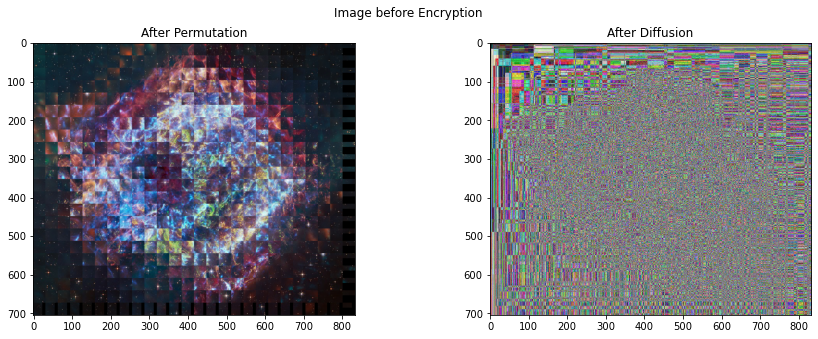

In [5]:
"""
Side-note: To enable diffusion, the image must be a multiple of T (I chose T = 32)
The image's shape shall be modified (via preprocesing()) to satisfy this requirement.
Eventually, the original-shape will be restored.
Consequently, I must store its original-shape.
"""
(cipher, org_shape) = Bob.encrypt_image(img, PU)

Text(0.5, 1.0, 'Encrypted Image')

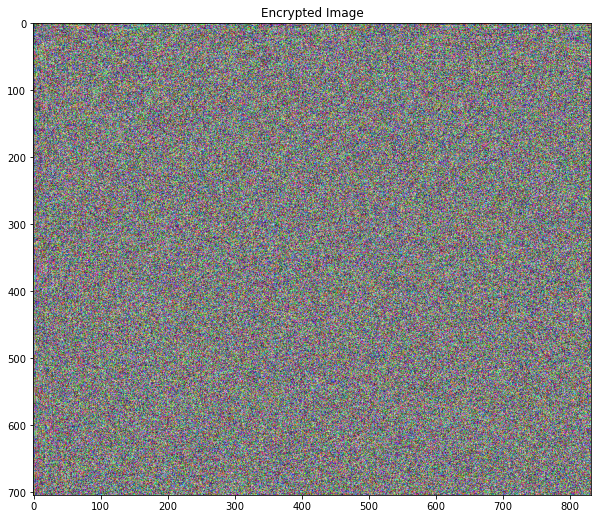

In [6]:
fig, axis = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 10))
axis.imshow(cipher/np.max(cipher))
axis.set_title("Encrypted Image")

**Alice decrypts the ciphertext**

In [7]:
#The image's dimensions were modified, thus Alice must be informed of the original-dimensions
decipher = Alice.decrypt_image(cipher, org_shape)

100%|███████████████████████████████████████████████████████████████████████| 585728/585728 [00:25<00:00, 23298.15it/s]


Text(0.5, 1.0, 'Decrypted Image')

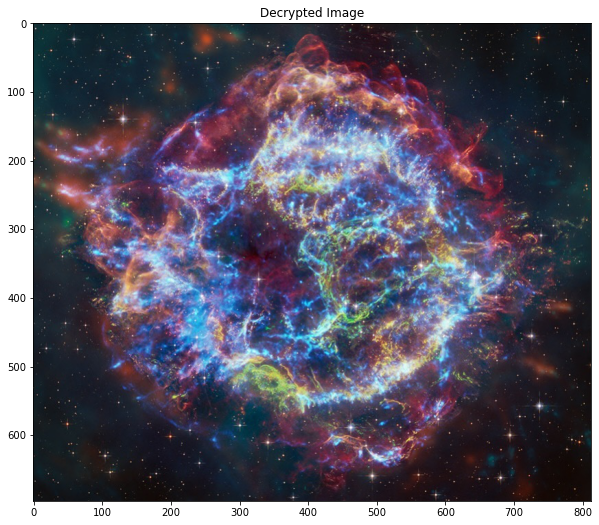

In [8]:
fig, axis = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 10))
axis.imshow(decipher)
axis.set_title("Decrypted Image")